In [25]:
#MAJOR Project - 1
#Classifier/Regression

In [26]:
#dataset:https://raw.githubusercontent.com/Sumank02/datasets/main/telecom.csv
#this dataset is about telecome empolyees from different regions.

In [27]:
#create dataframe
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Sumank02/datasets/main/telecom.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [29]:
df.shape

(1000, 12)

In [30]:
df.size

12000

In [31]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

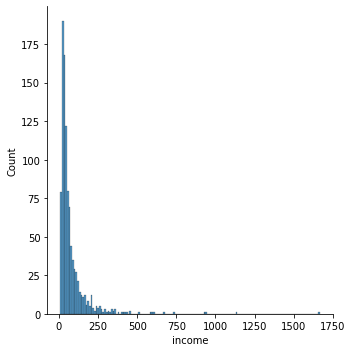

In [32]:
#visualisation
import seaborn as sns 
sns.displot(df['income'])

In [33]:
#divide the data into input and output
x=df.iloc[:,:12].values
x

array([[ 2., 13., 44., ...,  0.,  2.,  1.],
       [ 3., 11., 33., ...,  0.,  6.,  4.],
       [ 3., 68., 52., ...,  1.,  2.,  3.],
       ...,
       [ 3., 67., 59., ...,  1.,  1.,  4.],
       [ 3., 70., 49., ...,  1.,  1.,  3.],
       [ 3., 50., 36., ...,  1.,  3.,  2.]])

In [34]:
y=df.iloc[:,6].values
y

array([4, 5, 1, 2, 1, 2, 2, 2, 4, 1, 4, 2, 2, 4, 1, 5, 2, 2, 1, 4, 3, 1,
       5, 1, 1, 2, 2, 1, 2, 4, 1, 5, 2, 5, 3, 4, 4, 2, 1, 2, 1, 2, 2, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 3, 2, 3, 1, 2, 4, 2, 2, 2, 4, 2, 1,
       3, 1, 3, 4, 2, 4, 3, 5, 2, 2, 3, 2, 1, 4, 5, 1, 2, 3, 4, 2, 3, 4,
       5, 4, 5, 4, 5, 5, 2, 5, 1, 1, 1, 2, 3, 3, 1, 4, 3, 3, 2, 3, 4, 2,
       4, 4, 1, 4, 2, 3, 1, 2, 1, 1, 2, 2, 1, 5, 2, 2, 2, 4, 3, 1, 1, 1,
       2, 5, 5, 4, 4, 5, 2, 4, 5, 2, 4, 1, 1, 5, 5, 3, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 1, 4, 1, 3, 2, 1, 1, 5, 2, 4, 2, 3, 4, 4, 1, 2, 4, 2, 2,
       1, 4, 4, 4, 2, 2, 3, 2, 1, 3, 3, 4, 2, 4, 2, 3, 3, 3, 3, 2, 2, 3,
       4, 4, 3, 4, 3, 3, 4, 3, 2, 3, 4, 4, 2, 4, 2, 3, 4, 3, 1, 5, 3, 2,
       2, 5, 3, 1, 2, 3, 4, 4, 3, 1, 1, 2, 1, 4, 3, 1, 4, 4, 2, 3, 1, 2,
       1, 1, 3, 2, 2, 2, 3, 4, 4, 1, 5, 2, 4, 1, 4, 1, 2, 3, 1, 2, 3, 2,
       1, 1, 1, 2, 3, 2, 1, 4, 3, 1, 2, 2, 1, 3, 4, 1, 5, 5, 3, 3, 2, 4,
       1, 3, 2, 2, 3, 5, 4, 4, 3, 3, 1, 4, 3, 2, 1,

In [35]:
#train and test variables - train_test_split()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [36]:
print(x.shape) #(1000,12) - 100%
print(x_train.shape) #(750,12) - 75%
print(x_test.shape) #(250,12) - 25%

(1000, 12)
(750, 12)
(250, 12)


In [37]:
print(y.shape) #(1000,) - 100%
print(y_train.shape) #(750,) - 75%
print(y_test.shape) #(250,) - 25%

(1000,)
(750,)
(250,)


In [38]:
#normalization/scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [39]:
#run a classifier/regression/cluster
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [40]:
#fit the model(train the model)
model.fit(x_train,y_train)

LinearRegression()

In [41]:
#predict the output
y_pred=model.predict(x_test)
y_pred

array([3., 2., 3., 2., 2., 2., 1., 2., 3., 2., 3., 3., 1., 3., 2., 2., 1.,
       2., 1., 2., 5., 2., 4., 5., 4., 4., 4., 4., 3., 5., 4., 2., 2., 4.,
       3., 1., 2., 4., 3., 2., 1., 5., 4., 2., 1., 4., 2., 2., 3., 1., 1.,
       3., 3., 2., 4., 3., 3., 1., 4., 5., 3., 2., 4., 3., 3., 2., 1., 3.,
       5., 2., 3., 2., 3., 2., 3., 5., 2., 1., 1., 2., 2., 3., 2., 1., 1.,
       1., 4., 4., 3., 1., 2., 2., 2., 1., 2., 2., 2., 4., 2., 5., 1., 1.,
       1., 3., 2., 4., 4., 4., 2., 4., 1., 1., 4., 2., 1., 2., 4., 4., 2.,
       2., 4., 1., 1., 3., 2., 1., 2., 3., 2., 4., 4., 4., 3., 5., 4., 3.,
       4., 4., 3., 2., 3., 2., 5., 4., 4., 2., 3., 5., 3., 3., 4., 1., 1.,
       4., 1., 3., 1., 3., 4., 2., 2., 4., 3., 1., 1., 2., 3., 2., 2., 4.,
       5., 1., 5., 2., 2., 2., 1., 3., 2., 1., 1., 3., 1., 3., 2., 3., 4.,
       1., 2., 4., 2., 3., 5., 2., 2., 4., 1., 3., 1., 2., 3., 2., 1., 1.,
       2., 1., 3., 2., 4., 2., 4., 4., 2., 2., 3., 2., 4., 4., 1., 1., 2.,
       2., 2., 1., 4., 3.

In [42]:
#actual output values
y_test

array([3, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 2, 1, 2, 1, 2, 5, 2,
       4, 5, 4, 4, 4, 4, 3, 5, 4, 2, 2, 4, 3, 1, 2, 4, 3, 2, 1, 5, 4, 2,
       1, 4, 2, 2, 3, 1, 1, 3, 3, 2, 4, 3, 3, 1, 4, 5, 3, 2, 4, 3, 3, 2,
       1, 3, 5, 2, 3, 2, 3, 2, 3, 5, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 4, 4,
       3, 1, 2, 2, 2, 1, 2, 2, 2, 4, 2, 5, 1, 1, 1, 3, 2, 4, 4, 4, 2, 4,
       1, 1, 4, 2, 1, 2, 4, 4, 2, 2, 4, 1, 1, 3, 2, 1, 2, 3, 2, 4, 4, 4,
       3, 5, 4, 3, 4, 4, 3, 2, 3, 2, 5, 4, 4, 2, 3, 5, 3, 3, 4, 1, 1, 4,
       1, 3, 1, 3, 4, 2, 2, 4, 3, 1, 1, 2, 3, 2, 2, 4, 5, 1, 5, 2, 2, 2,
       1, 3, 2, 1, 1, 3, 1, 3, 2, 3, 4, 1, 2, 4, 2, 3, 5, 2, 2, 4, 1, 3,
       1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 4, 2, 4, 4, 2, 2, 3, 2, 4, 4, 1, 1,
       2, 2, 2, 1, 4, 3, 1, 2, 1, 4, 3, 2, 3, 2, 2, 4, 3, 3, 2, 2, 4, 1,
       3, 3, 2, 1, 3, 1, 1, 1])

In [43]:
print(x_train[10]) #these are the normalised/scaled values

[0.         0.98591549 0.74137931 1.         0.3877551  0.08800482
 0.5        0.63829787 0.         0.         0.14285714 0.66666667]


In [44]:
#individual prediction
#1
model.predict([x_train[8]])

array([5.])

In [45]:
#2
model.predict([x_train[600]])

array([2.])

In [46]:
#3
model.predict([x_train[1]])

array([3.])

In [47]:
#4
a=scaler.transform([[3,11,33,1,7,136.0,5,5,0.0,0,6,4]])
a

array([[1.        , 0.14084507, 0.22807018, 1.        , 0.12727273,
        0.17565698, 1.        , 0.11111111, 0.        , 0.        ,
        0.83333333, 1.        ]])

In [48]:
#5
b=scaler.transform([[8,14,27,0,9,157.0,6,7,0.4,1,5,1]])
b

array([[3.5       , 0.18309859, 0.12280702, 0.        , 0.16363636,
        0.20470263, 1.25      , 0.15555556, 0.4       , 1.        ,
        0.66666667, 0.        ]])